# **Image Classification with SVM and H.O.G.**


Estimated time needed: **45** minutes


As humans, it's easy to identify differences between two subjects. How does a machine tell them apart? One such way is through Support Vector Machines (SVM), a supervised learning model that analyzes data used for classification and regression tasks. In this lab, you'll learn to train SVM for classifying images of cats and dogs by extracting Histogram of Oriented Gradients (H.O.G.) features from the input. Notably, we can use the model on any new image that we upload!


## **Table of Contents**

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
        <ol>
            <li><a href="https://#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="https://#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="https://#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
       <a href="https://#Download-Image-Annotations">Download Image Annotations</a>
    </li>
    <li>
       <a href="https://#Histogram-of-Oriented-Gradients-(H.O.G.)">Histogram of Oriented Gradients (H.O.G.)</a>
    </li>
    <li>
       <a href="https://#Load-Images-into-Train/Test-Sets">Load Images into Train/Test Sets</a>
    </li>
    <li>
       <a href="https://#Hyperparameter-Tuning">Hyperparameter Tuning</a>
    </li>
    <li>
       <a href="https://#Predict-New-Images">Predict New Images</a>
    </li>
</ol>


## Objectives

After completing this guided project you will be able to:

*   Extract H.O.G. features from images
*   Train an SVM model on image inputs
*   Tune hyperparameters with Grid Search and evaluate model performance
*   Classify new images of cats and dogs with SVM


***


## Setup


For this guided project, we will be using the following libraries:

*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`OpenCV`](https://docs.opencv.org/4.x/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for other image processing functions.
*   [`scikit-learn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.3 numpy==1.21.2 ipywidgets==7.4.2 scipy==7.4.2 tqdm==4.62.3 matplotlib==3.5.0 seaborn==0.9.0 scikit-image skillsnetwork==0.20.3
# Note: If your environment doesn't support "!mamba install", use "!pip install".

### Importing Required Libraries


In [1]:
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from imutils import paths
import random
import time
from datetime import datetime
import json
import os

In [2]:
import cv2
from skimage.feature import hog
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

import skillsnetwork
from pathlib import Path

### Defining Helper Functions


We will load and process every image. Let's go over some concepts:

<ul>
        <ul>
            <li><code>cv2.resize()</code> to resize the image </li>
            <li><code>cv2.COLOR_BGR2GRAY()</code> will convert the images to greyscale image</li>
            <li><code>hog()</code> will get the H.O.G. features from the image </li>
        </ul>

</ul>

We will use this function to read and preprocess the images, the function will be explained in the **Histogram of Oriented Gradients (H.O.G.)** section.


In [3]:
def load_images(image_paths):
    train_images = []
    train_labels = []
    # loop over the input images
    for (i, image_path) in enumerate(image_paths):
        # check if image has a provided label
        if image_path[image_path.rfind("/")+1:] in annotations["annotations"]:
            # read image
            image = cv2.imread(image_path)
            # convert image into an array
            image = np.array(image).astype('uint8')
            # resize the image
            image = cv2.resize(image, (64, 64))
            # convert it to grayscale
            grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            # obtain hog features
            hog_features, hog_images = hog(grey_image,
                                           visualize=True,
                                           block_norm='L2-Hys',
                                           pixels_per_cell=(16, 16))
            # label image using the annotations
            label = class_object.index(annotations["annotations"][image_path[image_path.rfind("/")+1:]][0]['label'])
            train_images.append(hog_features)
            train_labels.append(label)
    return train_images, train_labels

## Download Image Annotations


First, we have to download the images dataset that we'll be using. By default, the `skillsnetwork.prepare()` function will unzip the file and save it in the current working directory.


In [4]:
# Download and unzip the images folder
# Note: an error will appear if you run it more than once because the files will already have been downloaded
await skillsnetwork.prepare("https://cv-studio-accessible.s3.us-south.cloud-object-storage.appdomain.cloud/cats_dogs_images_.zip")

  0%|          | 0/202 [00:00<?, ?it/s]

Saved to '.'


In [5]:
# Confirm the folder exists in the current directory
for path in Path(".").iterdir():
    print(path)

.ipynb_checkpoints
IBM-GPXX0ID4EN
IBM-GPXX0XCEEN
IBMDeveloperSkillsNetwork-GPXX0HAUEN
ML0101EN
ML0120EN
ML0232EN
PY0101EN
cats_dogs_images
classifying_cats_and_dogs_with_hog_and_svm.ipynb
edX
transform-photos-to-sketches-and-paintings-with-opencv


First, we'll extract each image's file name and associated label from the annotations JSON file. We will later use this for creating the train and test sets.


In [6]:
# Load the annotations JSON file containing file paths and image labels
f = open('cats_dogs_images/_annotations.json')

annotations = json.load(f)

Let's view the format of the annotations we've just downloaded. The following code will display only the first 5 annotations. The annotations will come in a JSON file. What you can see is the image name as the key and dog as label object.


In [7]:
first_five = {k: annotations["annotations"][k] for k in list(annotations["annotations"])[:5]}
first_five

{'645c2283-a71c-42ee-a841-3a696018eef8.jpg': [{'label': 'dog'}],
 'e95d9b59-1dd8-4747-abb9-bde400b7d25e.jpg': [{'label': 'dog'}],
 'e9d94988-099a-48e9-b6ad-bd939d0b92c0.jpg': [{'label': 'dog'}],
 '1710540b-b4dd-4697-bb7a-8e423fb05b1c.jpg': [{'label': 'dog'}],
 '4dc102a8-4d32-4870-9793-7d1199e33c97.jpg': [{'label': 'dog'}]}

## Histogram of Oriented Gradients (H.O.G.)


H.O.G. stands for Histogram of Oriented Gradients. It uses the gradient orientation of the localized regions of an image and generates a histogram for each localized region. We will pick a random image and see how H.O.G. works.


In [8]:
# Get path of random image in the folder titled "images" of the current directory
path = 'cats_dogs_images'
sample_image = os.path.join(path, random.choice(list(annotations["annotations"].keys())))
sample_image

'cats_dogs_images/8b242026-3e9e-48e9-9ddf-fba067653b92.jpg'

To create H.O.G. features, we will first convert the image to a grayscale image. Using the image path, we load it.


In [9]:
sample_image = cv2.imread(sample_image)
sample_image

array([[[ 66,  91,  71],
        [ 53,  81,  58],
        [ 60,  88,  65],
        ...,
        [ 85, 120, 116],
        [ 97, 132, 128],
        [110, 145, 141]],

       [[ 65,  92,  72],
        [ 60,  88,  65],
        [ 64,  92,  69],
        ...,
        [ 90, 124, 118],
        [101, 135, 129],
        [112, 146, 140]],

       [[ 62,  90,  70],
        [ 66,  95,  72],
        [ 62,  91,  68],
        ...,
        [ 98, 130, 125],
        [107, 139, 134],
        [116, 148, 143]],

       ...,

       [[136, 164, 158],
        [133, 161, 155],
        [128, 156, 150],
        ...,
        [ 61,  52,  43],
        [ 83,  74,  65],
        [ 98,  89,  80]],

       [[123, 151, 145],
        [115, 143, 137],
        [108, 136, 130],
        ...,
        [ 50,  43,  34],
        [ 64,  57,  48],
        [ 74,  67,  58]],

       [[ 90, 118, 112],
        [ 82, 110, 104],
        [ 85, 116, 109],
        ...,
        [ 44,  39,  30],
        [ 54,  49,  40],
        [ 60,  55,  46]]

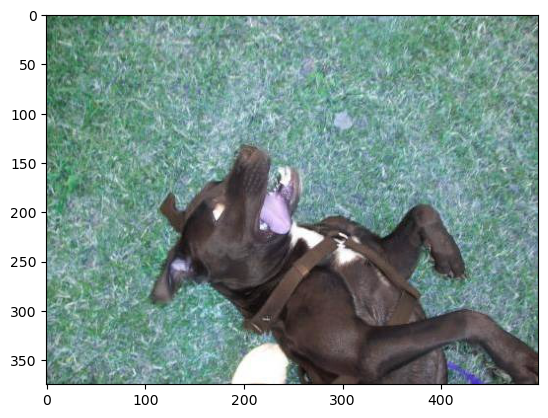

In [10]:
# Plot the sample image
plt.imshow(sample_image)

In [11]:
# Check the dimension of the image
sample_image.shape

(375, 499, 3)

Resize the image to a smaller size to allow the algorithm to run faster and convert the images to the grayscale to reduce the number of channels. `OpenCV` reads images as `BGR` so we will be using that color channel to convert to grayscale.

Early developers at `OpenCV` chose `BGR` color format because it was the format that was popular among camera manufacturers and software providers.


In [12]:
# Resize the sample image to take dimension 64x64
sample_image = cv2.resize(sample_image, (64, 64))

# Convert image from BGR to grayscale
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)

Plot the data to look at what it looks like:


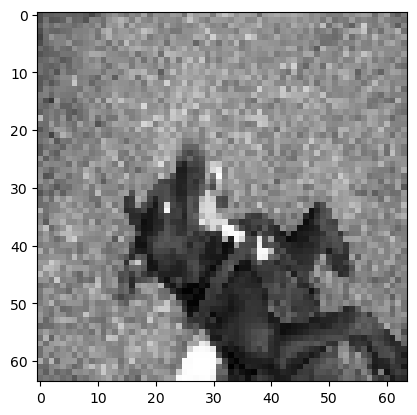

In [13]:
plt.imshow(sample_image, cmap=plt.cm.gray)

Let's run H.O.G. on the grayscale image to see what it will look like. We use a variation of L2-norm for normalization, and set cell size to 16x16. When we run H.O.G., it returns an array of features and the image/output it produced. The features are what we will use to train the SVM model.


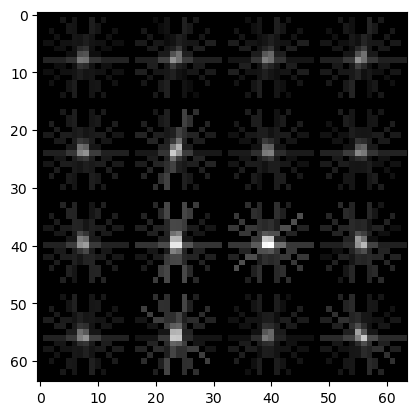

In [14]:
# Obtain the features and image output from H.O.G.
sample_image_features, sample_hog_image = hog(image=sample_image,
                                              visualize=True,
                                              block_norm='L2-Hys',
                                              pixels_per_cell=(16, 16))

# Plot the H.O.G. image
plt.imshow(sample_hog_image, cmap=plt.cm.gray)

You can see that the H.O.G. image identified some of the edges in the original image!


## Load Images into Train/Test Sets


Now we're ready to apply H.O.G. to all images for SVM! First, let's load all the image paths and labels into separate lists using the function `load_images()`.


In [15]:
# Obtain all the images' paths from directory 'images'
image_paths = list(paths.list_images('cats_dogs_images'))

# List for all unique class labels in the dataset
class_object = annotations['labels']

In [16]:
# Load all images and labels from directory
train_images, train_labels = load_images(image_paths)

Create an array of the images so that the classifier can process it correctly.


In [17]:
# Convert list into array
train_array = np.array(train_images)
print(train_array.shape)

(200, 324)


We will <code>reshape</code> the array to <code>(total labels, 1)</code>. The array will look like this: <code>\[\[1], \[0], ..., \[0]]</code></p>


In [18]:
# Convert list into array
labels_array = np.array(train_labels)

# Make sure each entry is cast as integer and check array shape
labels_array = labels_array.astype(int)
print(labels_array.shape)

(200,)


In [19]:
# Reshape it so that it takes the appropriate dimension
labels_array = labels_array.reshape((labels_array.size,1))
print(labels_array.shape)

(200, 1)


Concatenate the images and labels into a dataframe for better organization.


In [20]:
# Create a dataframe for all the images and labels
train_df = np.concatenate([train_array, labels_array], axis = 1)

Divide the dataset into train and test sets for both features and responses (class labels).


In [21]:
# Define how much % of the data should be used for training
np.random.seed(0)
percentage = 90
partition = int(len(train_df)*percentage/100)

In [22]:
# Split the dataset into training and test using the partition
x_train, x_test = train_df[:partition,:-1],  train_df[partition:,:-1]
y_train, y_test = train_df[:partition,-1:].ravel(), train_df[partition:,-1:].ravel()

## Hyperparameter Tuning


To optimize performance for this classification task, we'll try out several combinations of hyperparameters to see which one yields the best results.


The kernel type to be used is a hyperparameter. The most common kernels are <code>RBF</code>, <code>poly</code>, or <code>sigmoid</code>. You can also create your own kernel.

<code>C</code> behaves as a regularization parameter in the SVM. The <code>C</code> parameter trades off correct classification of the training examples against the maximization of the decision function’s margin. For larger values of <code>C</code>, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower <code>C</code> will encourage a larger margin, therefore a simpler decision function at the cost of accuracy. We select C and the best kernel by using the validation data.


In [23]:
# Define the hyperparameter values we want to try
param_grid = {'kernel': ('linear', 'rbf', 'sigmoid'),'C': [1, 10, 50, 75, 100]}

<code>gamma</code> is a parameter of the RBF kernel and can be thought of as the spread of the kernel and, therefore, the decision region. Low values mean ‘far’ and high values mean ‘close’. The behaviour of the model is very sensitive to the gamma parameter. If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself. Setting <code>gamma = 'scale'</code> uses 1 / (n_features \* X.var()) as value of gamma. We create a Support Vector Classification object.


In [24]:
# Define the base SVM model
base_estimator = SVC(gamma='scale')

We will train the model and try different kernels and parameter values using the function <code>GridSearchCV</code>. The resulting output will be the model that performs best on the validation data.


In [25]:
# Record the start time of this tuning session
start_datetime = datetime.now()
start = time.time()

# Perform Grid Search using the base model and the dictionary of hyperparameters
svm = GridSearchCV(base_estimator, param_grid, cv=5)

# Fit the data into the classifier
svm.fit(x_train, y_train)

# Get best hyperparameters from grid search
best_parameters = svm.best_params_
print("The best parameters are: {}".format(best_parameters))
print("----")

# Predict on the validation set
y_pred = svm.predict(x_test)

# Print accuracy score for the model on validation set
print("Accuracy: \n"+str(accuracy_score(y_test, y_pred)))
print("----")

# Record end time
end = time.time()
end_datetime = datetime.now()
print("Total time spent for grid search: {}".format(end - start))

The best parameters are: {'C': 50, 'kernel': 'sigmoid'}
----
Accuracy: 
0.7
----
Total time spent for grid search: 1.3889195919036865


## Predict New Images


Now, let's use the best model from grid search for predicting new images! First, we will define a SVM model using the best hyperparameter combinations.


In [26]:
# Define the best performing model
model = svm.best_estimator_
model

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now, we will define a helper function to use SVM for predicting the label of a new image.


In [39]:
def run_svm(image):
    # show the original image in RGB
    orig_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(orig_image)
    plt.show()
    print('\n')
    
    # convert the image into a numpy array
    image = np.array(image).astype('uint8')
    
    # resize the image to a size of choice
    image = cv2.resize(image, (64, 64))
    
    # convert to grayscale to reduce the information in the picture
    grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # extract H.O.G features
    hog_features, hog_image = hog(grey_image,
                                  visualize=True,
                                  block_norm='L2-Hys',
                                  pixels_per_cell=(16, 16))
    
    # convert the H.O.G features into a numpy array
    image_array = np.array(hog_features)
    
    # reshape the array
    image_array = image_array.reshape(1, -1)
    
    # make a label prediction
    svm_pred = model.predict(image_array)
    
    # print the prediction
    print('Your image was classified as a ' + str(annotations['labels'][int(svm_pred[0])]))    

Then, upload an image of your choice to see if the model is able to accurately predict whether the image has a dog or cat!


TypeError: Image data of dtype object cannot be converted to float

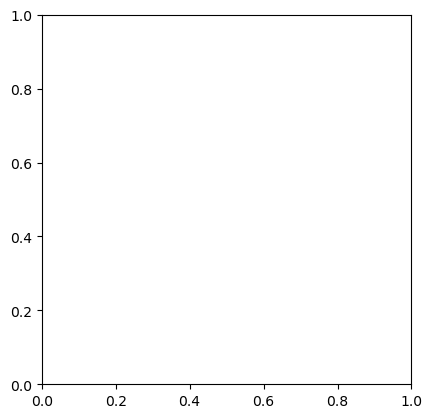

In [38]:
# Replace "your_uploaded_file" with your file name
my_image = cv2.imread("your_uploaded_file.jpg")

# Run the above function on the image to get a classification
run_svm(my_image)

This concludes the lab. If you want to learn more about computer vision, check out [this course](https://www.coursera.org/learn/introduction-computer-vision-watson-opencv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsIBMGPXX047NEN37658726-2022-01-01), which delves further into image processing and other image classification models!
